In [1]:
!pip install DL_BI


[notice] A new release of pip available: 22.3 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from DL_BI import dl4n


    import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load Fashion MNIST data
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize images
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# Reshape to include channel dimension (28x28x1)
x_train_full = x_train_full.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_full_cat = to_categorical(y_train_full, 10)
y_test_cat = to_categorical(y_test, 10)

# Split training into train and validatio

C:\Users\21118\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.5928 - loss: 1.0934 - val_accuracy: 0.8151 - val_loss: 0.5113
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7969 - loss: 0.5633 - val_accuracy: 0.8407 - val_loss: 0.4169
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8224 - loss: 0.4878 - val_accuracy: 0.8589 - val_loss: 0.3784
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8336 - loss: 0.4557 - val_accuracy: 0.8687 - val_loss: 0.3555
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8469 - loss: 0.4160 - val_accuracy: 0.8741 - val_loss: 0.3396
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


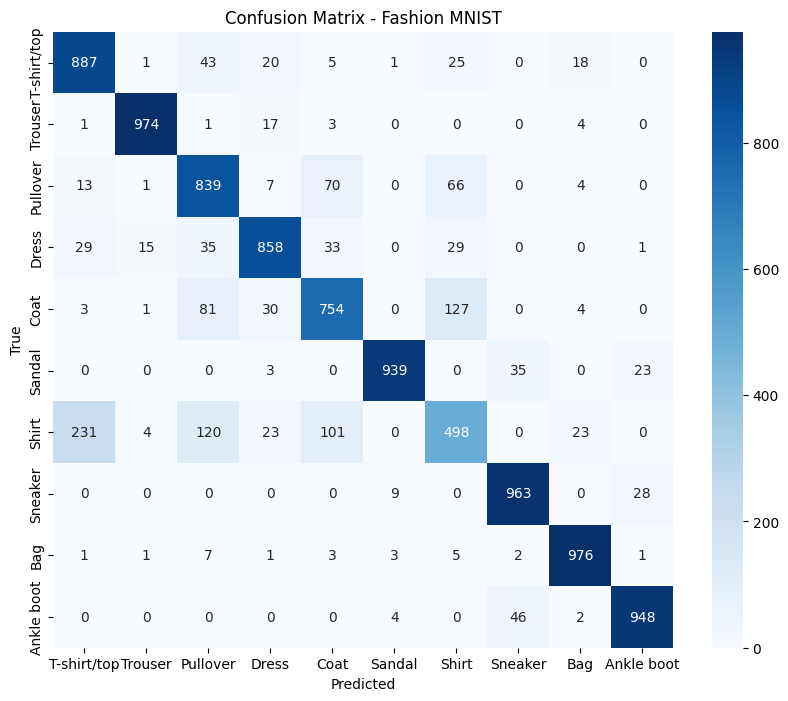

Classification Report:               precision    recall  f1-score   support

 T-shirt/top       0.76      0.89      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.75      0.84      0.79      1000
       Dress       0.89      0.86      0.88      1000
        Coat       0.78      0.75      0.77      1000
      Sandal       0.98      0.94      0.96      1000
       Shirt       0.66      0.50      0.57      1000
     Sneaker       0.92      0.96      0.94      1000
         Bag       0.95      0.98      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load Fashion MNIST data
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize images
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

# Reshape to include channel dimension (28x28x1)
x_train_full = x_train_full.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_full_cat = to_categorical(y_train_full, 10)
y_test_cat = to_categorical(y_test, 10)

# Split training into train and validation (80-20)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full_cat, test_size=0.2, random_state=42)

# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes in Fashion MNIST
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Training
early_stop = EarlyStopping(monitor='val_loss', patience=3 )
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val), callbacks=[early_stop])

# Predictions
pred_probs = model.predict(x_test)
y_pred = np.argmax(pred_probs, axis=1)
y_true = y_test
class_labels = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Fashion MNIST')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:", report)